# Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import cv2

In [2]:
!pip install tensorflow

# Loading Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Visualizing the image Data

In [4]:
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

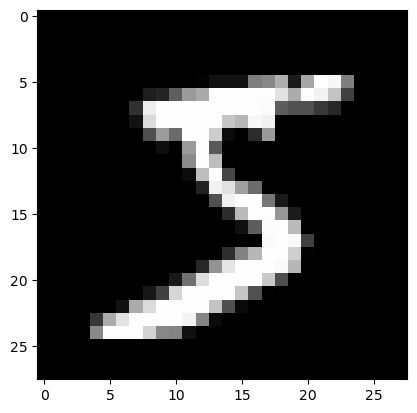

In [9]:
plt.imshow(single_image, cmap = 'gray')

# PreProcessing Data

### Labels

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
y_cat_test = to_categorical(y_test,10)
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape

(60000, 10)

#### Processing X Data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

In [24]:
scaled_single.min()

0.0

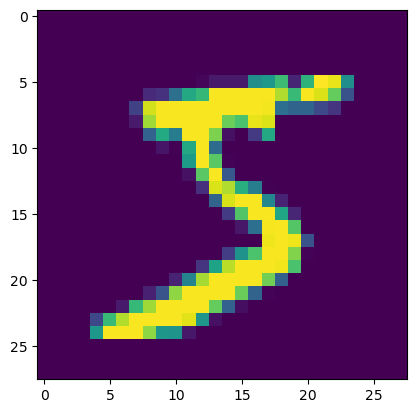

In [25]:
plt.imshow(scaled_single)

### Reshaping the Data

In [26]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [27]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [28]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Training the Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [30]:
model = Sequential()

#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))

#POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

#FLATTEN IMAGES FROM 28 by 28 to 784 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (THIS NUMBER OF NEURONS CANNOT BE CHANGED)
model.add(Dense(784, activation = 'relu'))

#LAST LAYER IS CLASSIFIER,THUS 10 POSSIBLE CASES
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 25, 25, 16)          │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │       1,807,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,815,242 (6.92 MB)

 Trainable params: 1,815,242 (6.92 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.9274 - loss: 0.2381 - val_accuracy: 0.9830 - val_loss: 0.0511
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9884 - val_loss: 0.0383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9883 - val_loss: 0.0359
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9948 - loss: 0.0147 - val_accuracy: 0.9849 - val_loss: 0.0518
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9883 - val_loss: 0.0451


## Evaluating the Model

In [35]:
model.metrics_names

['loss', 'compile_metrics']

In [36]:
losses = pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.963700,0.120377,0.9830,0.051125
1,0.986783,0.042016,0.9884,0.038340
2,0.992000,0.024964,0.9883,0.035941
3,0.994817,0.015663,0.9849,0.051824
4,0.996200,0.011749,0.9883,0.045086


<Axes: >

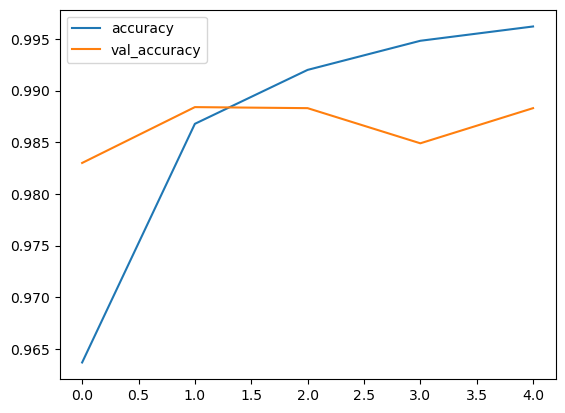

In [37]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

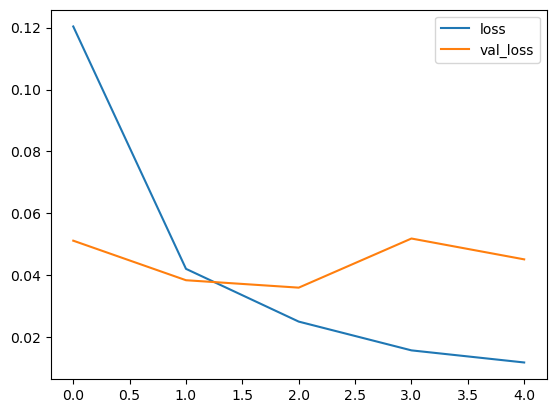

In [38]:
losses[['loss','val_loss']].plot()

In [39]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'compile_metrics']
[0.04508595168590546, 0.9883000254631042]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [42]:
y_cat_test[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [43]:
predictions[7]

9

In [44]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1130,    0,    0,    3,    0,    2,    0,    0,    0],
       [   1,    1, 1020,    1,    2,    0,    0,    4,    3,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    0,    3,    0],
       [   0,    1,    0,    0,  975,    0,    1,    0,    0,    5],
       [   3,    1,    0,    8,    0,  874,    4,    0,    2,    0],
       [   6,    1,    0,    0,    6,    2,  940,    0,    3,    0],
       [   0,    3,    6,    0,    0,    0,    0, 1016,    1,    2],
       [   4,    1,    1,    1,    1,    0,    0,    1,  964,    1],
       [   2,    5,    0,    3,    8,    1,    0,    4,    3,  983]],
      dtype=int64)

In [47]:
import seaborn as sns

Text(0.5, 36.72222222222221, 'Predicted Labels')

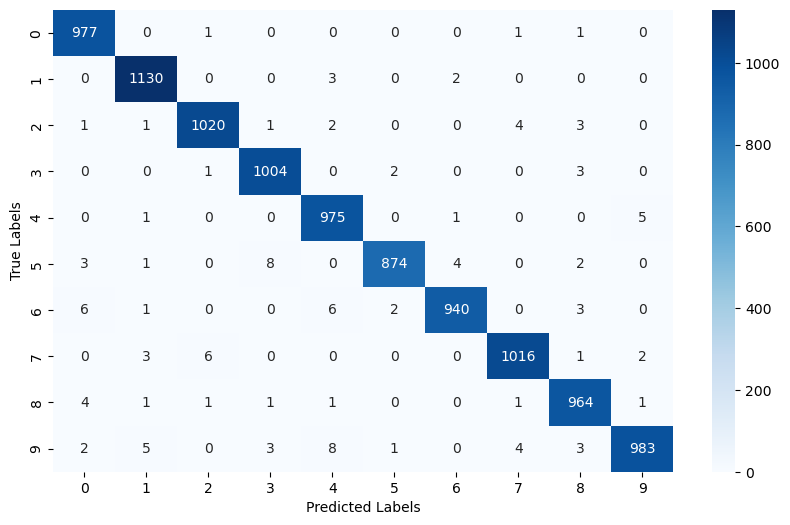

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Predicting a given Image

In [49]:
my_digit = x_test[0]

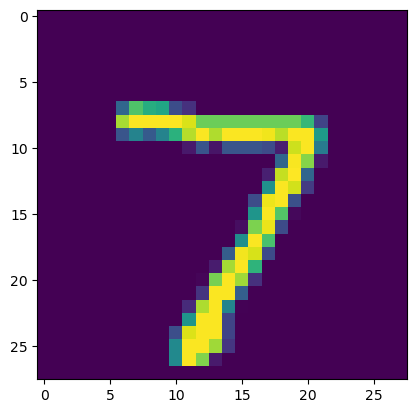

In [50]:
plt.imshow(my_digit.reshape(28,28))

In [51]:
my_prediction = model.predict(my_digit.reshape(1,28,28,1))
my_prediction = np.argmax(my_prediction, axis = -1)
print(my_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[7]


In [52]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [53]:
type(input_image)

numpy.ndarray

In [54]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


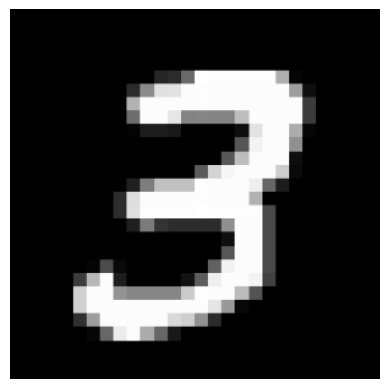

In [55]:
img_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

In [57]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [58]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [59]:
input_image_resize.shape

(28, 28)

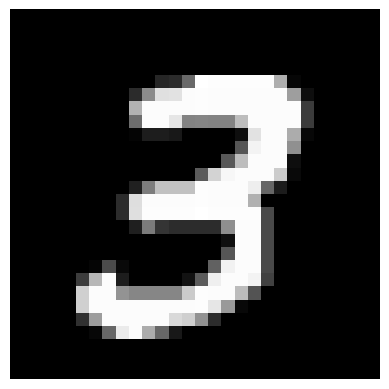

In [63]:
plt.imshow(cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

In [64]:
input_image_resize = input_image_resize/255

In [73]:
image_reshaped = np.reshape(input_image_resize, [28,28,1])

In [74]:
print(image_reshaped.shape)  # To check the shape of the input

(28, 28, 1)


In [75]:
image_reshaped = np.expand_dims(image_reshaped, axis=0)
print(image_reshaped.shape)  # Should now be (1, height, width, channels)


(1, 28, 28, 1)


In [76]:
image_reshaped = image_reshaped.astype('float32')


In [77]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[4.3986074e-17 8.6131369e-10 1.1533661e-08 1.0000000e+00 8.9104859e-16
  2.1002254e-11 2.0626715e-17 1.5243543e-09 2.5625215e-09 4.7970579e-11]]


In [79]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


### Predictive System

Path of the image to be predicted: MNIST_digit.png


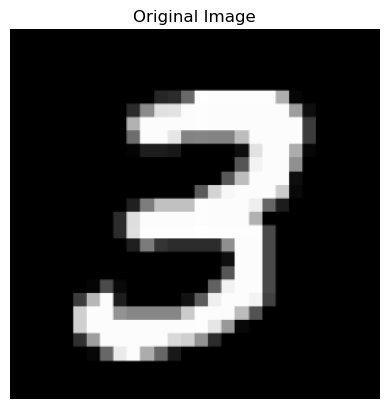

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The Handwritten Digit is recognised as 3


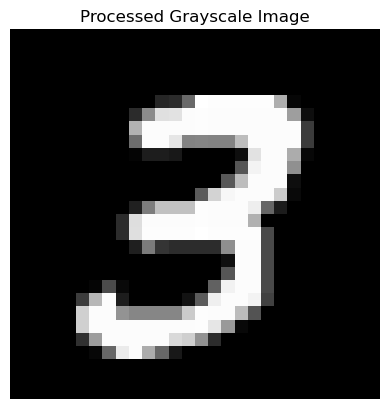

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model
# model = load_model('path_to_your_model.h5')

# Input the image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image using OpenCV
input_image = cv2.imread(input_image_path)

# Display the original image using Matplotlib
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels
input_image_resize = cv2.resize(grayscale, (28, 28))

# Normalize the pixel values
input_image_resize = input_image_resize / 255.0

# Reshape the image to match the input shape of the model
image_reshaped = np.reshape(input_image_resize, [1, 28, 28,1])

# Make the prediction
input_prediction = model.predict(image_reshaped)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Print the prediction
print('The Handwritten Digit is recognised as', input_pred_label)

# Display the processed grayscale image
plt.imshow(input_image_resize, cmap='gray')
plt.title('Processed Grayscale Image')
plt.axis('off')
plt.show()
